In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

In [48]:
dataset_path = '/content/drive/MyDrive/Original_MonkeyPox_Dataset'

In [49]:
import os

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The directory {dataset_path} does not exist. Please check the dataset path.")

print("Contents of the dataset directory:")
print(os.listdir(dataset_path))

Contents of the dataset directory:
['Monkeypox_Dataset_metadata.csv', 'Original Images', 'Fold1', 'Augmented Images']


In [50]:
train_path = os.path.join(dataset_path, 'Fold1/Train')
test_path = os.path.join(dataset_path, 'Fold1/Test')

In [51]:
train_path, test_path

('/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Train',
 '/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Test')

In [52]:
train_images = os.listdir(train_path)
for folder in train_images :
    images = os.listdir(train_path +'/'+ str(folder))
    print(folder)

Others
Monkeypox


Others


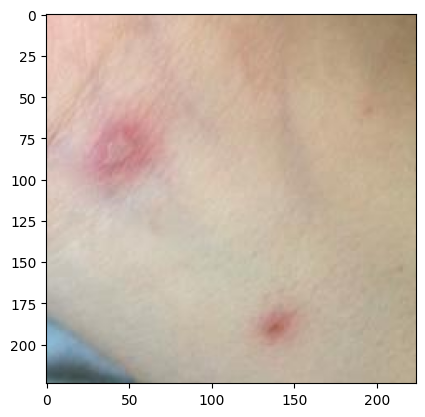

Monkeypox


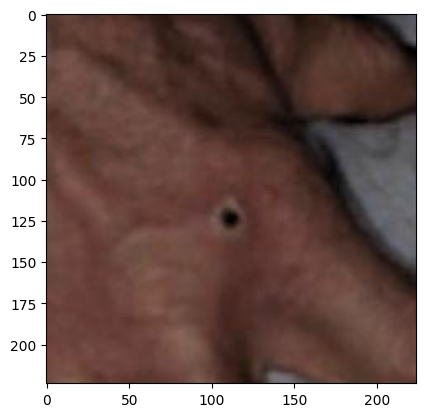

In [53]:
train_images = os.listdir(train_path)
for folder in train_images :
    images = os.listdir(train_path +'/'+ str(folder))
    print(folder)
    img = mpimg.imread(train_path +'/'+ str(folder) +'/'+images[7])
    imgplot = plt.imshow(img)
    plt.show()

In [54]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [46]:
Accuracy = {}

In [55]:
labels = os.listdir(train_path)

img_size = 224
train_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Train',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='training',
    seed=22
)

Found 2142 files belonging to 2 classes.
Using 1714 files for training.


In [57]:

def get_model(base, preprocessor, img_size):
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model


In [62]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
pre_trained_model = tf.keras.applications.ResNet50(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)


In [58]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
pre_trained_model = tf.keras.applications.ResNet50(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [63]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)


In [65]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 3)